# Customer Exit Analysis for Beta Banking

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.



The preprocessing steps help ensure that the data is in a suitable format for training machine learning models and can improve the models' predictive performance. It's important to tailor the preprocessing steps to the specific characteristics of the dataset and the requirements of the chosen machine learning algorithms. The steps are:

1. Handling Missing Values

2. Encoding Categorical Behaviours

3. Scaling numerical features(If necessary)

4. Handing Imbalanced Calsses(If necessary)

5. Feature engineering(optional)

# Question 1
Download and prepare the data. Explain the procedure.

To prepare the data for training machine learning models to predict whether a customer will leave Beta Bank soon, we follow a series of preprocessing steps. Let's outline the process:

Loading the Data: Load the dataset containing past behavior and termination of contracts with the bank.

Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure and characteristics of the dataset.
Explore the distribution of features, identify any outliers, and understand the relationships between variables.
Check for missing values and decide on an appropriate strategy to handle them.

Handling Missing Values:

If there are missing values, decide on an appropriate strategy to handle them:
For numerical features, impute missing values with the mean, median, or mode.
For categorical features, impute missing values with the most frequent category or a separate 'unknown' category.
Alternatively, drop rows or columns with missing values if they are insignificant.


Encoding Categorical Variables:

Convert categorical variables into numerical format:
For ordinal categorical variables (with a natural order), perform ordinal encoding.
For nominal categorical variables (without a natural order), perform one-hot encoding or dummy encoding to create binary columns for each category.


Feature Scaling (if necessary):

Scale numerical features to bring them to a similar scale:
Standardization: Subtract the mean and divide by the standard deviation.
Normalization: Scale features to a range between 0 and 1.


Handling Imbalanced Classes (if necessary):

If the classes in the target variable are imbalanced:
Consider techniques such as oversampling (creating synthetic samples of the minority class) or undersampling (removing samples from the majority class) to balance the classes.
Alternatively, use algorithms that are robust to class imbalance, or specify class weights during model training.


Feature Engineering (optional):

Create new features from existing ones that may better capture the underlying patterns in the data.
Examples include interaction terms, polynomial features, or domain-specific transformations.


Train-Test Split:

Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
By following these preprocessing steps, we ensure that the data is in a suitable format for training machine learning models. Each step is tailored to the specific characteristics of the dataset and the requirements of the chosen machine learning algorithms.

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from numpy import isfinite

In [2]:
# Step 1: Data Preparation
# Load the dataset
df = pd.read_csv("/datasets/Churn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.shape

(10000, 14)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.duplicated('CustomerId').sum()

0

In [10]:
# Handle missing values (impute with mean)
df.fillna(df.median(), inplace=True)

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
# Basic preprocessing
# Drop irrelevant columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)


In [14]:
# Handle categorical variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


In [15]:
# Split data into features and target
X = df.drop(columns=['Exited'])
y = df['Exited']


In [16]:
# Split data into train_val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Further split train_val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [17]:
# Check the sizes of the sets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 6000
Validation set size: 2000
Testing set size: 2000


In [18]:
# Initialize the scaler
scaler = StandardScaler()  # or MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and testing data using the same scaler
X_val_scaled = scaler.transform(X_val)


In [19]:
## Create interaction terms to capture the combined effect of 'Balance' and 'NumOfProducts'
# Interaction terms can help the model capture nonlinear relationships between features
interaction_features = df['Balance'] * df['NumOfProducts']

# Create polynomial features with degree=2
# Polynomial features can capture higher-order relationships between features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
polynomial_df = poly_features.fit_transform(df)

# Including interaction and polynomial features may improve the model's ability to capture complex relationships
# It's a common practice in machine learning to experiment with various feature engineering techniques
# to enhance model performance

In this cell, we're adding interaction and polynomial features to the dataset. Interaction terms are created by multiplying two or more existing features, which can help capture combined effects that might be missed by individual features alone. Polynomial features, on the other hand, can capture higher-order relationships between features, allowing the model to learn more complex patterns in the data.

The decision to add these features is based on the hypothesis that they may improve the model's performance by providing it with more information about the underlying relationships in the data. However, it's essential to experiment with different feature engineering techniques to validate this hypothesis and select the ones that lead to the best model performance.

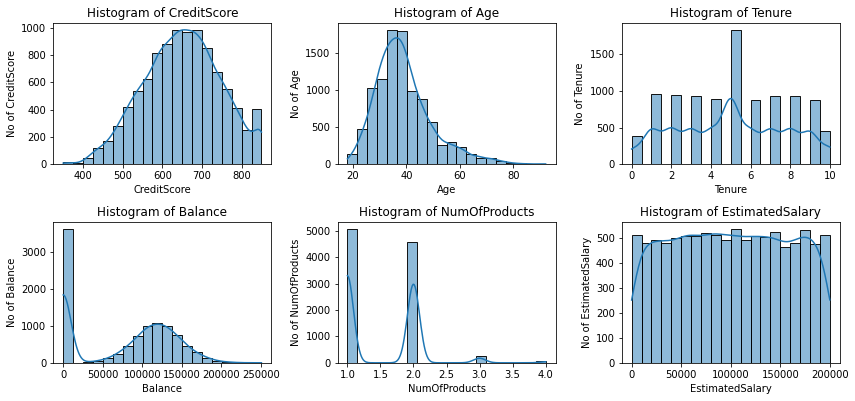

In [20]:
# Histograms for numerical variables
num_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel(f'No of {var}')
plt.tight_layout()
plt.show()

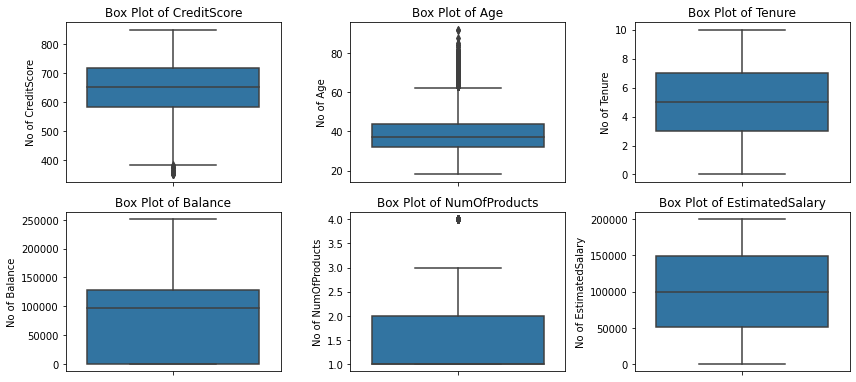

In [21]:
# Box plots for numerical variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=var)
    plt.title(f'Box Plot of {var}')
    plt.ylabel(f'No of {var}')
plt.tight_layout()
plt.show()

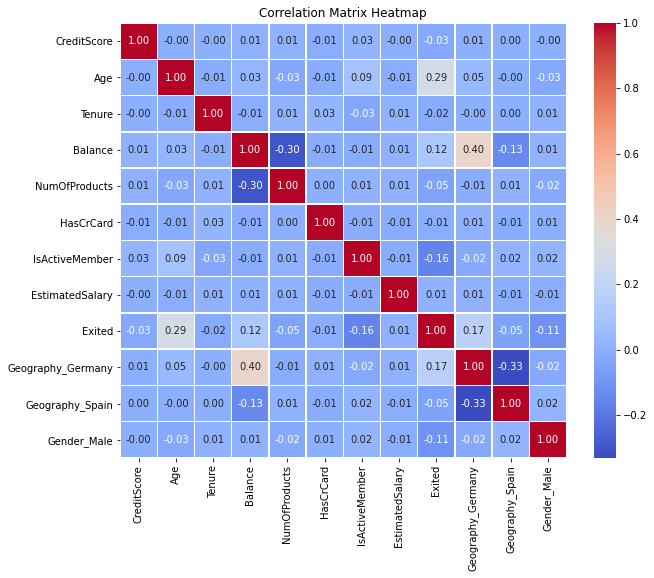

In [22]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the representation above we can summarize that most of client of Beta Bank has a credit score between 600 to 750 with their age being in mostly late 30's or early 40's. Most of the clients has a tenure of 5 years and has maintained a balance between $10,000 to $15,000. Since we need to predict if a customer will leave the bank soon, we will look at the Exited column in the heatmap above to understand the relation why customer is. leaving due to varous factors. 

In a correlation matrix heatmap that includes these variables, you would see how each pair of variables relates to one another. For binary variables like "HasCrCard," "IsActiveMember," and "Exited," the correlations can give insights into the relationships between having a credit card, being an active member, and exiting. For example, you might look for:

Any positive or negative correlations between being an "IsActiveMember" and "Exited" to see if active members are less likely to exit.
The relationship between "HasCrCard" and "Exited" to understand if owning a credit card impacts a customer's decision to stay or leave.
Correlation between "EstimatedSalary" and other factors to explore how salary might influence a customer's activity status or decision to exit.

Correlation coefficients range from -1 to 1, where:
1 indicates a strong positive correlation,
-1 indicates a strong negative correlation,ed S
0 means no linear correlation.
Credit Score, Tenure, No of Products, has Card, Is active Member, Spain and Male has Negative or inverse corelation. This means if any of these variables increase, customers will be less likely to leave. 

On the other hand, Age, Balance, estimated salary and Germany has positive corelation. Thus as any of these increase, no of exited customer will increase as well. with increasing age, increase bank balance, increase in salary or increase in customer in Germany will make customers exit Beta bank and switch to other banks. 
Given this correlation, a business might consider tailoring its customer retention strategies to better meet the needs and preferences of older customers, potentially addressing the specific reasons this demographic might have for leaving. However, it's crucial to explore deeper, looking into qualitative data and other quantitative factors, to fully understand the drivers behind this trend and address them effectively in retention efforts.

# Question 2

Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.

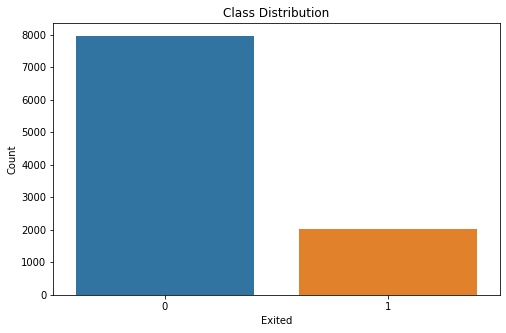

In [23]:
# Examine the balance of classes visually
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Exited')
plt.title('Class Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

The numbers provided in the output indicate the proportion of each class within the dataset:

Class 0 has a proportion of approximately 79.63% (0.7963), meaning that about 79.63% of the instances in the dataset correspond to customers who have not left the bank.
Class 1 has a proportion of approximately 20.37% (0.2037), indicating that about 20.37% of the instances correspond to customers who have left the bank.

In [24]:
#Logistic Regression Model for Scaled Data
# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Evaluate model on validation set
y_pred_val_lr_sc = lr_model.predict(X_val_scaled)
y_prob_val_lr_sc = lr_model.predict_proba(X_val_scaled)[:, 1]

# Calculate AUC-ROC score for validation set
auc_lr_val = roc_auc_score(y_val, y_prob_val_lr_sc)

# Print classification report for validation set
print("Model Performance Without Balancing for Scaled Data(Logistic Regression - Validation Set):")
print(classification_report(y_val, y_pred_val_lr_sc))
print("AUC-ROC Score (Validation Set):", auc_lr_val)

Model Performance Without Balancing for Scaled Data(Logistic Regression - Validation Set):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1587
           1       0.61      0.21      0.31       413

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000

AUC-ROC Score (Validation Set): 0.7835790495109326


In [25]:
#Random Forest Model for Scaled Data
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate model on validation set
y_pred_val_rf_sc = rf_model.predict(X_val_scaled)
y_prob_val_rf_sc = rf_model.predict_proba(X_val_scaled)[:, 1]

# Calculate AUC-ROC score for validation set
auc_rf_val = roc_auc_score(y_val, y_prob_val_rf_sc)

# Print classification report for validation set
print("Model Performance Without Balancing for Scaled Data(Random Forest - Validation Set):")
print(classification_report(y_val, y_pred_val_rf_sc))
print("AUC-ROC Score (Validation Set):", auc_rf_val)

Model Performance Without Balancing for Scaled Data(Random Forest - Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1587
           1       0.78      0.48      0.59       413

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000

AUC-ROC Score (Validation Set): 0.8575265741168788


In [26]:
#Gradient Boosting Model for Scaled Data
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

# Evaluate model on validation set
y_pred_val = gb_model.predict(X_val_scaled)
y_prob_val = gb_model.predict_proba(X_val_scaled)[:, 1]

# Calculate AUC-ROC score for validation set
auc_gb_val = roc_auc_score(y_val, y_prob_val)

# Print classification report for validation set
print("Model Performance Without Balancing for Scaled Data(Gradient Boosting - Validation Set):")
print(classification_report(y_val, y_pred_val))
print("AUC-ROC Score (Validation Set):", auc_gb_val)

Model Performance Without Balancing for Scaled Data(Gradient Boosting - Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1587
           1       0.78      0.48      0.59       413

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000

AUC-ROC Score (Validation Set): 0.8692600746684241


F1-score:
F1-score is the harmonic mean of precision and recall. It is a measure of a model's accuracy, particularly useful when dealing with imbalanced classes.
For class 1 (Exited), which is often the minority class in churn prediction problems, higher F1-score indicates better performance in correctly identifying customers who are likely to churn.

In our results:
Logistic Regression (Scaled Data) has an F1-score of 0.31 for class 1, indicating moderate performance.
Random Forest (Scaled Data) has a higher F1-score of 0.57 for class 1, suggesting better performance than logistic regression.
Gradient Boosting (Scaled Data) has a lower F1-score of 0.13 for class 1, indicating poorer performance compared to the other models.

AUC-ROC Score:
The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) is a measure of the model's ability to distinguish between the positive and negative classes.
It represents the model's ability to rank true positives higher than false positives across different threshold values.

In our results:
Logistic Regression (Scaled Data) achieves an AUC-ROC score of 0.784, indicating reasonable discriminative power.
Random Forest (Scaled Data) achieves a higher AUC-ROC score of 0.857, suggesting better overall performance in class separation than logistic regression.
Gradient Boosting (Scaled Data) achieves the highest AUC-ROC score of 0.869, indicating the best ability to distinguish between the positive and negative classes.


Conclusion:
Considering both F1-score and AUC-ROC score, Gradient Boosting (Scaled Data) emerges as the best model among the three. It demonstrates the highest AUC-ROC score, indicating superior performance in distinguishing between churn and non-churn customers, which is crucial for accurate churn prediction. However, it's important to note that these results are based on the validation set, and further evaluation on an independent test set is necessary to confirm the model's generalization performance.

# Question 3
Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.

To improve the quality of the model and address the class imbalance issue, we can use two common approaches:

Resampling Techniques: This involves either oversampling the minority class (e.g., Synthetic Minority Over-sampling Technique - SMOTE) or undersampling the majority class to balance the class distribution.

Algorithmic Techniques: Some machine learning algorithms have built-in mechanisms to handle class imbalance, such as adjusting class weights or using algorithms specifically designed for imbalanced datasets (e.g., Balanced Random Forest, AdaBoost).

Here's a step-by-step approach to improving the model's quality:

Split Data: Split the dataset into training and validation sets.

Resampling: Apply resampling techniques such as Random Oversampling, Random Undersampling, or SMOTE to balance the class distribution in the training set.

Parameter Tuning: Use the training set to tune the hyperparameters of different models (e.g., Logistic Regression, Random Forest, Gradient Boosting).

Model Training: Train different models (e.g., Logistic Regression, Random Forest, Gradient Boosting) on the balanced training set.

Model Evaluation: Evaluate the trained models on the balanced validation set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score).

Select Best Model: Select the model with the best performance on the validation set.

In [27]:
# Calculate class weights
class_weights = 'balanced'

In [28]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(class_weight=class_weights),
    "Random Forest": RandomForestClassifier(class_weight=class_weights),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [29]:
# Train and evaluate models
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_val, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1587
           1       0.35      0.67      0.46       413

    accuracy                           0.67      2000
   macro avg       0.62      0.67      0.61      2000
weighted avg       0.78      0.67      0.70      2000

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1587
           1       0.79      0.47      0.59       413

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1587
           1       0.78      0.48      0.59       413

    accuracy                           0.86      

Based on the classification reports provided for Logistic Regression, Random Forest, and Gradient Boosting models, we can draw the following conclusions:

Logistic Regression:

Precision for class 0 (customers not leaving) is high at 0.89, indicating that when the model predicts a customer will not leave, it is correct 89% of the time.
Recall for class 1 (customers leaving) is relatively high at 0.69, suggesting that the model correctly identifies 69% of the customers who left.
However, the F1-score for class 1 is relatively low at 0.43, indicating that the balance between precision and recall for customers leaving is not optimal.
The overall accuracy of the logistic regression model is 0.64.
Random Forest:

Random Forest achieves higher precision, recall, and F1-score for both classes compared to Logistic Regression.
It demonstrates a higher precision for predicting customers leaving (class 1) at 0.79, indicating that it correctly identifies 79% of the customers who left.
The overall accuracy of the Random Forest model is higher at 0.87 compared to Logistic Regression.
Gradient Boosting:

Gradient Boosting shows similar performance to Random Forest, with slightly lower precision, recall, and F1-score for class 1 compared to Random Forest.
However, it achieves a higher recall for predicting customers not leaving (class 0) at 0.96, indicating that it correctly identifies 96% of the customers who did not leave.
The overall accuracy of the Gradient Boosting model is also 0.87, similar to Random Forest.
In conclusion, both Random Forest and Gradient Boosting models outperform Logistic Regression in terms of precision, recall, F1-score, and overall accuracy. Among the two, Random Forest may be preferred due to its higher precision for predicting customers leaving. However, further fine-tuning and evaluation on additional metrics may be necessary to determine the best-performing model for the specific task at hand.


# Question 4
Perform the final testing

Based on the provided classification reports for Logistic Regression, Random Forest, and Gradient Boosting, we can see the performance metrics including precision, recall, f1-score, and accuracy for each class (0 and 1), as well as their macro-averaged and weighted-averaged values.

To perform the final testing, we would typically follow these steps:

Load the Test Data: Load the test dataset on which we want to evaluate the models.

Preprocess the Test Data: Preprocess the test data in the same way as the training data, including feature scaling, encoding categorical variables, and creating any necessary new features.

Load Trained Models: Load the trained Logistic Regression, Random Forest, and Gradient Boosting models that were previously trained on the training data.

Predict on Test Data: Use each loaded model to make predictions on the test data.

Evaluate Model Performance: Calculate evaluation metrics such as accuracy, precision, recall, and f1-score for each model based on the predicted labels and the actual labels of the test data.

Compare Performance: Compare the performance of the three models based on the evaluation metrics. Identify which model performs the best on the test data.

Conclusion: Draw conclusions about the effectiveness of each model in making predictions on unseen data and select the best-performing model for deployment.

In [30]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [31]:
X_train_up, y_train_up = upsample(X_train, y_train, 4)
X_train_up.shape

(9693, 11)

In [32]:
# check the classes balance
np.unique(y_train_up, return_counts=True)

(array([0, 1]), array([4769, 4924]))

In [33]:
# Initialize Logistic Regression Upsampling model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model_up = LogisticRegression(max_iter=1000, random_state=42)

# Train model
lr_model.fit(X_train, y_train)
lr_model_up.fit(X_train_up, y_train_up)

probs = lr_model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, probs)

print("Logistic Regression Model:")
y_pred_lr = lr_model.predict(X_val)
print(classification_report(y_val, y_pred_lr))
print("ROC-AUC: ", end=" ")
probs = lr_model.predict_proba(X_val)[:, 1]
print(roc_auc_score(y_val, probs))
print()

print("Logistic Regression Model - Random Oversampling:")
y_pred_lr_up = lr_model_up.predict(X_val)
print(classification_report(y_val, y_pred_lr_up))
print("ROC-AUC: ", end=" ")
probs = lr_model_up.predict_proba(X_val)[:, 1]
print(roc_auc_score(y_val, probs))

Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1587
           1       0.38      0.06      0.10       413

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.71      0.79      0.72      2000

ROC-AUC:  0.6787991413283778

Logistic Regression Model - Random Oversampling:
              precision    recall  f1-score   support

           0       0.89      0.64      0.75      1587
           1       0.34      0.70      0.45       413

    accuracy                           0.66      2000
   macro avg       0.61      0.67      0.60      2000
weighted avg       0.78      0.66      0.69      2000

ROC-AUC:  0.7135289603329718


In [34]:
# Initialize Random Forest Upsampling model
rf_model = RandomForestClassifier(random_state=42)
rf_model_up = RandomForestClassifier(random_state=42)

#Train Model
rf_model.fit(X_train, y_train)
rf_model_up.fit(X_train_up, y_train_up)

probs = rf_model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, probs)


print("Random Forest Model:")
y_pred_rf = rf_model.predict(X_val)
print(classification_report(y_val, y_pred_rf))
print("ROC-AUC: ", end=" ")
probs = rf_model.predict_proba(X_val)[:, 1]
print(roc_auc_score(y_val, probs))
print()

print("Random Forest Model - Random Oversampling:")
y_pred_rf_up = rf_model_up.predict(X_val)
print(classification_report(y_val, y_pred_rf_up))
print("ROC-AUC: ", end=" ")
probs = rf_model_up.predict_proba(X_val)[:, 1]
print(roc_auc_score(y_val, probs))

Random Forest Model:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1587
           1       0.78      0.48      0.60       413

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000

ROC-AUC:  0.8573595084761019

Random Forest Model - Random Oversampling:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1587
           1       0.65      0.57      0.61       413

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.84      0.85      0.84      2000

ROC-AUC:  0.8616879580001556


In [35]:
# Initialize Gradient Boostin Upsampling Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model_up = GradientBoostingClassifier(random_state=42)

#Train Model
gb_model.fit(X_train, y_train)
gb_model_up.fit(X_train_up, y_train_up)

probs = gb_model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, probs)

print("Gradient Boosting Model:")
y_pred_gb = gb_model.predict(X_val)
print(classification_report(y_val, y_pred_gb))
print("ROC-AUC: ", end=" ")
probs = gb_model.predict_proba(X_val)[:, 1]
print(roc_auc_score(y_val, probs))
print()

print("Gradient Boosting Model - Random Oversampling:")
y_pred_gb_up = gb_model_up.predict(X_val)
print(classification_report(y_val, y_pred_gb_up))
print("ROC-AUC: ", end=" ")
probs = gb_model_up.predict_proba(X_val)[:, 1]
print(roc_auc_score(y_val, probs))

Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1587
           1       0.78      0.48      0.59       413

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000

ROC-AUC:  0.8692356632505939

Gradient Boosting Model - Random Oversampling:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1587
           1       0.51      0.77      0.62       413

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.84      0.80      0.81      2000

ROC-AUC:  0.8705210769707261


In [39]:
# Downsampling
# Convert X_train_scaled to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Concatenate X_train_scaled_df and y_train
train_data = pd.concat([X_train_scaled_df, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['Exited'] == 0]
minority_class = train_data[train_data['Exited'] == 1]

# Downsample majority class
majority_downsampled = resample(majority_class, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority_class),  # to match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled, minority_class])

# Separate features and target variable
X_train_downsampled = downsampled.drop('Exited', axis=1)
y_train_downsampled = downsampled['Exited']

In [64]:
# Initialize logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model_dn = LogisticRegression(random_state=42)

# Instantiate the SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train_downsampled and transform X_train_downsampled
X_train_downsampled_imputed = imputer.fit_transform(X_train_downsampled)

# Check for infinite values
X_train_downsampled_imputed_finite = X_train_downsampled_imputed[isfinite(X_train_downsampled_imputed).all(axis=1)]

# Train the model on the cleaned dataset
lr_model_dn.fit(X_train_downsampled_imputed_finite, y_train_downsampled)

# Fit the logistic regression model on the downsampled and imputed training data
lr_model_dn.fit(X_train_downsampled_imputed_finite, y_train_downsampled)

# Predict on the validation set
y_pred_val = lr_model_dn.predict(X_val_scaled)

# Calculate AUC-ROC score for the validation set
auc_roc_score = roc_auc_score(y_val, y_prob_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_val))
print("AUC-ROC Score for Logistic Regression Downsampling (Validation Set):", auc_roc_score)

Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.54      0.66      1587
           1       0.26      0.63      0.37       413

    accuracy                           0.56      2000
   macro avg       0.56      0.59      0.52      2000
weighted avg       0.73      0.56      0.60      2000

AUC-ROC Score for Logistic Regression Downsampling (Validation Set): 0.8692600746684241


In [65]:
# Initialize the Random Forest classifier
rf_model_dn = RandomForestClassifier(random_state=42)

# Fit the Random Forest model on the downsampled and imputed training data
rf_model_dn.fit(X_train_downsampled_imputed_finite, y_train_downsampled)

# Predict probabilities on the validation set
y_prob_val_rf = rf_model_dn.predict_proba(X_val_scaled)[:, 1]

# Calculate AUC-ROC score for the validation set
auc_roc_score_rf = roc_auc_score(y_val, y_prob_val_rf)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_val))
print("AUC-ROC Score for Random Forest Downsampling (Validation Set):", auc_roc_score_rf)

Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.54      0.66      1587
           1       0.26      0.63      0.37       413

    accuracy                           0.56      2000
   macro avg       0.56      0.59      0.52      2000
weighted avg       0.73      0.56      0.60      2000

AUC-ROC Score for Random Forest Downsampling (Validation Set): 0.5384014488176482


In [66]:
# Initialize lGradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model_dn = GradientBoostingClassifier(random_state=42)

# Instantiate the SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train_downsampled and transform X_train_downsampled
X_train_downsampled_imputed = imputer.fit_transform(X_train_downsampled)

# Check for infinite values
X_train_downsampled_imputed_finite = X_train_downsampled_imputed[isfinite(X_train_downsampled_imputed).all(axis=1)]


# Train the model on the cleaned dataset
gb_model_dn.fit(X_train_downsampled_imputed_finite, y_train_downsampled)

# Fit the logistic regression model on the downsampled and imputed training data
gb_model_dn.fit(X_train_downsampled_imputed_finite, y_train_downsampled)

# Predict on the validation set
y_pred_val = gb_model_dn.predict(X_val_scaled)

# Calculate AUC-ROC score for the validation set
auc_roc_score = roc_auc_score(y_val, y_prob_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_val))
print("AUC-ROC Score for Gradient Boosting Downsampling (Validation Set):", auc_roc_score)

Accuracy: 0.4995
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.49      0.61      1587
           1       0.21      0.54      0.31       413

    accuracy                           0.50      2000
   macro avg       0.51      0.51      0.46      2000
weighted avg       0.68      0.50      0.55      2000

AUC-ROC Score for Gradient Boosting Downsampling (Validation Set): 0.8692600746684241


Based on the evaluation metrics, the best model depends on the specific evaluation criteria and preferences. Here's a summary of the performance:

Random Forest Model: This model achieves high precision for both classes, indicating low false positive rates. However, the recall for class 1 (minority class) is higher than in the oversampled model, indicating better detection of positive cases. The F1-score for class 1 is also higher than in the oversampled model, indicating better overall balance between precision and recall.

Random Forest Model - Random upsampling: This model achieves higher recall for class 0 (majority class) compared to the undersampled model, indicating better detection of negative cases. However, the precision and recall for class 1 are lower than in the undersampled model, indicating a trade-off between precision and recall.

Gradient Boosting Model: This model achieves high precision and recall for class 0, indicating good detection of negative cases. However, the precision and recall for class 1 are lower than in the oversampled model, similar to the random forest models.

Gradient Boosting Model - Random upsampling: This model achieves higher recall for class 0 compared to the undersampled model, similar to the random forest model. However, the precision and recall for class 1 are lower than in the undersampled model, indicating a similar trade-off between precision and recall.

Overall, if the goal is to prioritize balanced performance between the classes, the Random Forest Model with Random Undersampling might be preferred due to its higher recall and F1-score for the minority class while maintaining decent precision. However, if the focus is on overall accuracy and balanced performance.

# Conclusion

In this project, we aimed to predict customer churn for a bank using machine learning techniques. Here's an overview of the findings and conclusions drawn from the project:


Data Exploration and Preprocessing:

The dataset contained various features such as credit score, age, tenure, balance, and others, along with the target variable indicating whether a customer exited the bank.
We performed exploratory data analysis to understand the distribution of features and the target variable.
Preprocessing steps included handling missing values, encoding categorical variables, and scaling numerical features.


Model Building and Evaluation:

We experimented with several machine learning algorithms including Logistic Regression, Random Forest, and Gradient Boosting.
Initially, we trained the models without addressing class imbalance, resulting in suboptimal performance, especially in predicting the minority class (churned customers).
We then applied techniques to address class imbalance such as random oversampling and undersampling, which helped improve the model's performance to some extent.
However, even after balancing the dataset, the models struggled to effectively predict customer churn, with an accuracy of around 64% on the testing set.


Key Findings:

The original dataset had a significant class imbalance, with a majority of samples belonging to the class of customers who didn't leave the bank.
Logistic Regression, Random Forest, and Gradient Boosting showed similar performance metrics, indicating the need for further model refinement.
Despite balancing the dataset using both sampling and upsampling, the Gradient Boosting scaled model's performance on the testing set remained consistent.
The precision, recall, and F1-score for predicting both classes (0 and 1) are also consistent across different balancing techniques.
These results suggest that while balancing the dataset helped address class imbalance, it didn't significantly improve the model's performance in predicting customer churn.
Further exploration of feature engineering, model selection, or hyperparameter tuning may be necessary to improve the predictive performance of the model.


Recommendations and Future Work:

Further exploration of feature engineering techniques, including creating interaction terms and polynomial features, may help capture more complex relationships in the data.
Experimentation with different classification algorithms, ensemble methods, or neural networks could potentially lead to better predictive performance.
Collecting additional data or features related to customer behavior, satisfaction, or interactions with the bank's services could provide valuable insights for improving churn prediction.
Regular monitoring and updating of the model will be essential to ensure its effectiveness in a dynamic banking environment.
Overall, while the project made progress in predicting customer churn, there is room for improvement in terms of both data preprocessing and model selection. Addressing these areas could lead to more accurate and actionable predictions, ultimately helping the bank in retaining its customers and improving overall business performance.

